# Weather data analysis
#### BY GOKUL VENU

### importing librarries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Load the dataset


In [2]:
df = pd.read_csv('C:\\Users\\acer\\Desktop\\New Folder (3)\\weather\\weather.csv')

### Data cleaning


In [3]:
df.dropna(inplace=True)


##### Convert 'Yes'/'No' to binary for 'RainToday' and 'RainTomorrow'

In [4]:
df['RainToday'].replace({'No': 0, 'Yes': 1}, inplace=True)
df['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace=True)


### Summary statistics for numerical features

In [5]:
print(df.describe())

          MinTemp     MaxTemp    Rainfall  Evaporation    Sunshine  \
count  328.000000  328.000000  328.000000   328.000000  328.000000   
mean     7.742988   20.897561    1.440854     4.702439    8.014939   
std      5.945199    6.707310    4.289427     2.681183    3.506646   
min     -5.300000    7.600000    0.000000     0.200000    0.000000   
25%      2.850000   15.500000    0.000000     2.550000    6.000000   
50%      7.900000   20.400000    0.000000     4.400000    8.750000   
75%     12.800000   25.800000    0.200000     6.600000   10.700000   
max     20.900000   35.800000   39.800000    13.800000   13.600000   

       WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
count     328.000000    328.000000    328.000000   328.000000   328.000000   
mean       40.396341     10.414634     18.185976    71.100610    44.003049   
std        13.132176      7.811544      8.926759    12.983367    16.605975   
min        13.000000      2.000000      4.000000    36.00

### Distribution of RainTomorrow

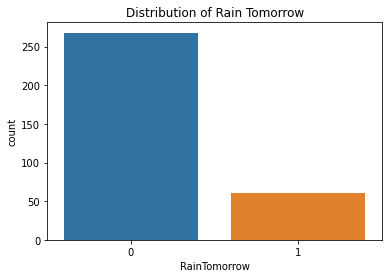

In [6]:
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df)
plt.title('Distribution of Rain Tomorrow')
plt.show()


###  Temperature distribution

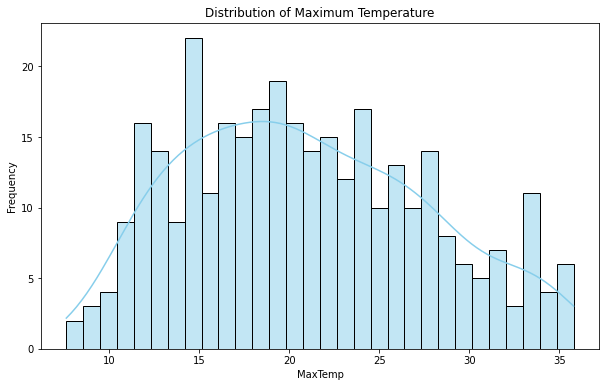

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(df['MaxTemp'], kde=True, color='skyblue', bins=30)
plt.title('Distribution of Maximum Temperature')
plt.xlabel('MaxTemp')
plt.ylabel('Frequency')
plt.show()

### Rainfall distribution

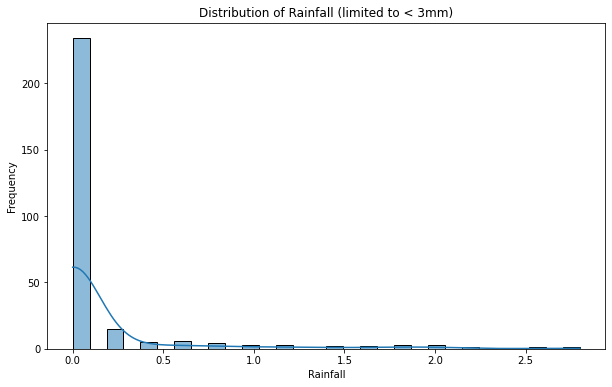

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['Rainfall'] < 3]['Rainfall'], kde=True, bins=30)  # Limiting to rainfall < 3mm for better visualization
plt.title('Distribution of Rainfall (limited to < 3mm)')
plt.xlabel('Rainfall')
plt.ylabel('Frequency')
plt.show()


### Relationship between Humidity3pm and RainTomorrow

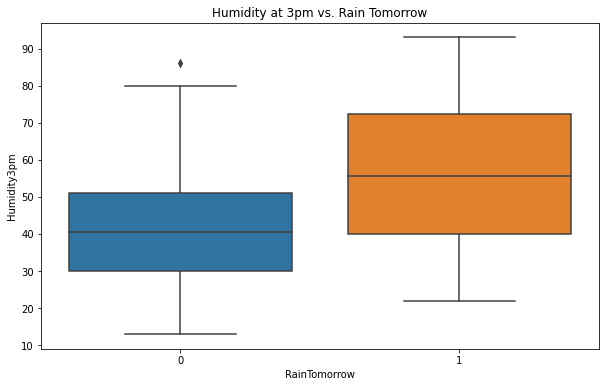

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='RainTomorrow', y='Humidity3pm', data=df)
plt.title('Humidity at 3pm vs. Rain Tomorrow')
plt.show()


### Correlation heatmap

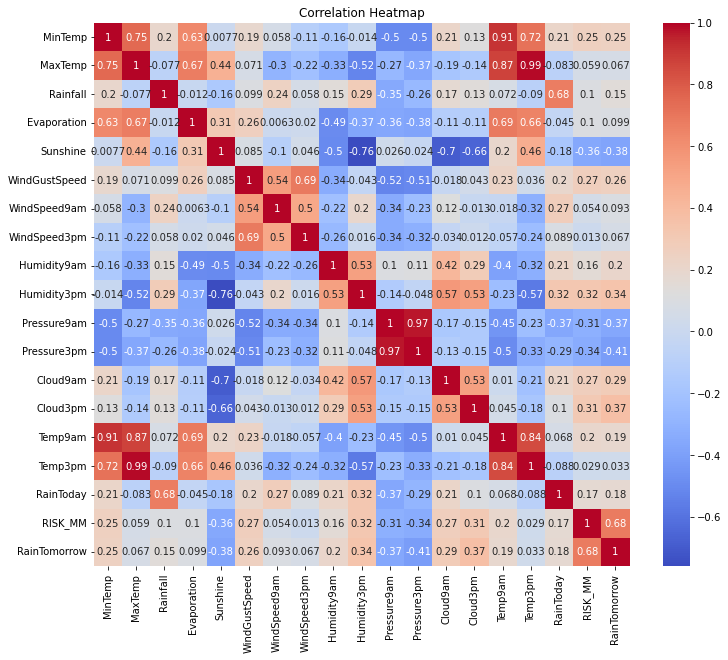

In [10]:
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### Results and conclusion